# Assignment 1

## Group members
- Axel Gustafsson - gusgusaxa@student.gu.se
- Erdem Halil - gushaliler@student.gu.se

#### Part 1: Real estate prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

real_estate_data = pd.read_csv('houses.csv', names=["Hash", "Price", "Date of Sale", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "Location" , "L", "M"])

In [2]:
real_estate_data['Price'].describe().apply("{0:.2f}".format)

count      100000.00
mean       174386.75
std        351463.40
min           150.00
25%         74000.00
50%        129000.00
75%        207000.00
max      48465717.00
Name: Price, dtype: object

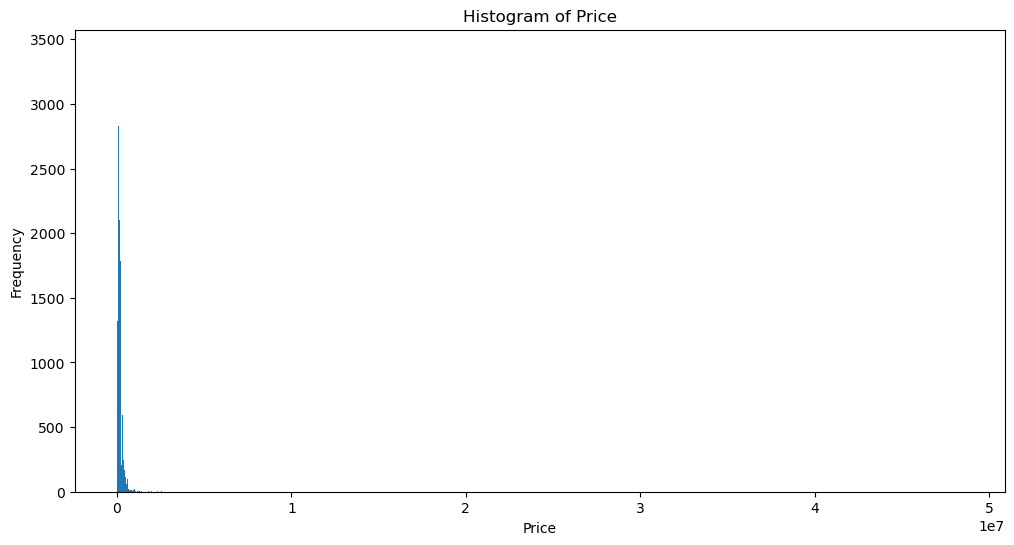

In [3]:
# Histogram of the price
plt.figure(figsize=(12,6))
plt.hist(real_estate_data['Price'], bins='auto')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

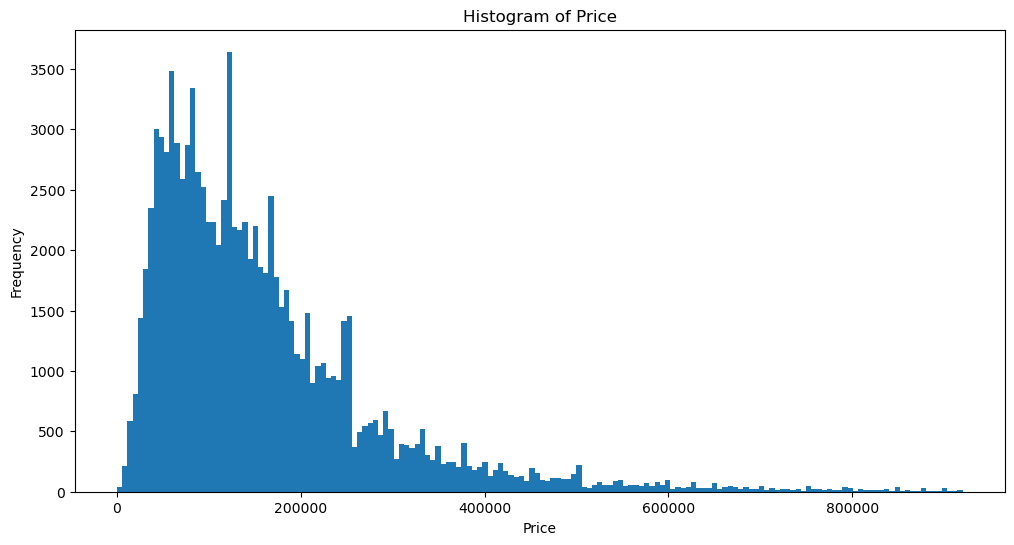

In [4]:
out = real_estate_data[real_estate_data['Price'] < np.percentile(real_estate_data['Price'], 99.2)]

# Histogram of the price
plt.figure(figsize=(12,6))
plt.hist(out['Price'], bins='auto')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

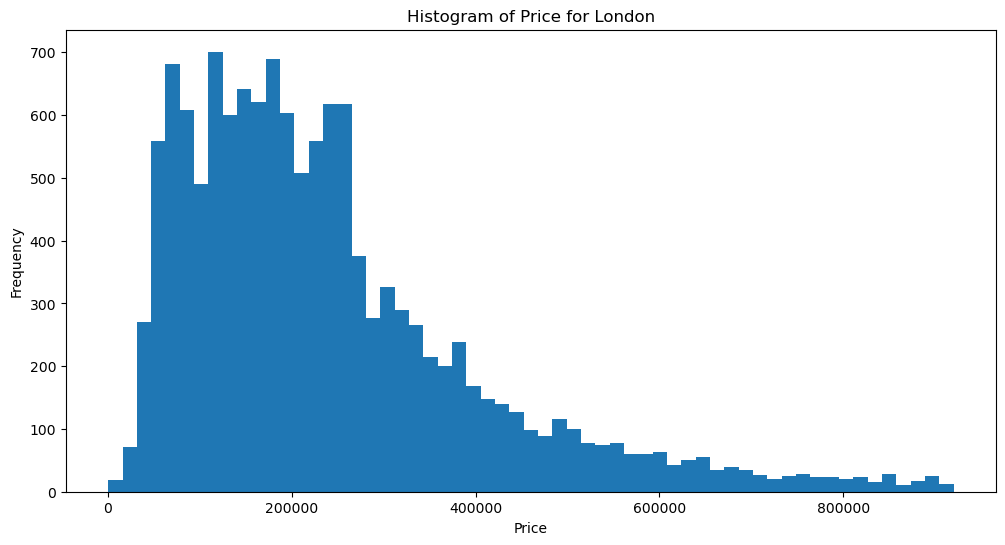

In [5]:
# Is real estate more expensive in London? Plot histograms for the two subsets of properties inside and outside London, respectively. For practical purposes, we can define "inside London" to mean that the string in the 14th column (Python indexing column 13) includes the string LONDON.
in_london = out['Location'].str.contains('LONDON')

london = out[in_london]
not_london = out[~in_london]

# Histogram of the price for london
plt.figure(figsize=(12,6))
plt.hist(london['Price'], bins='auto')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price for London')
plt.show()

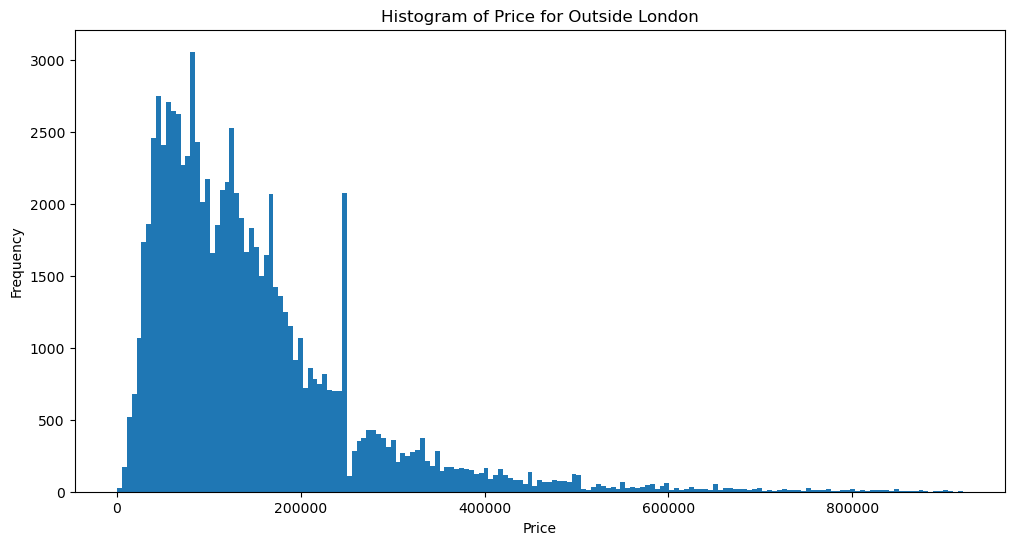

count     13001.00
mean     239851.72
std      164293.35
min         501.00
25%      122500.00
50%      200000.00
75%      308400.00
max      920000.00
Name: Price, dtype: object


count     86199.00
mean     147400.02
std      113929.91
min         150.00
25%       69000.00
50%      120000.00
75%      187000.00
max      920000.00
Name: Price, dtype: object

In [6]:
# Histogram of the price for london
plt.figure(figsize=(12,6))
plt.hist(not_london['Price'], bins='auto')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price for Outside London')
plt.show()

print(london['Price'].describe().apply("{0:.2f}".format))
not_london['Price'].describe().apply("{0:.2f}".format)

## Part 2: Histogram and quantile

In [7]:
titanic_data = pd.read_csv('titanic_train.csv')

titanic_data

,Unnamed: 0,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr,1
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs,1
2,2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss,0
3,3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs,1
4,4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0,211536,Rev,0
887,887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1,112053,Miss,0
888,888,22.0,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0,W./C. 6607,Miss,3
889,889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1,111369,Mr,0


#### Identify the data types of these four columns and plot their distributions

- Embarked - Nominal data
- PClass - Ordinal data
- Parch - Discrete data
- Fare - Continuous data

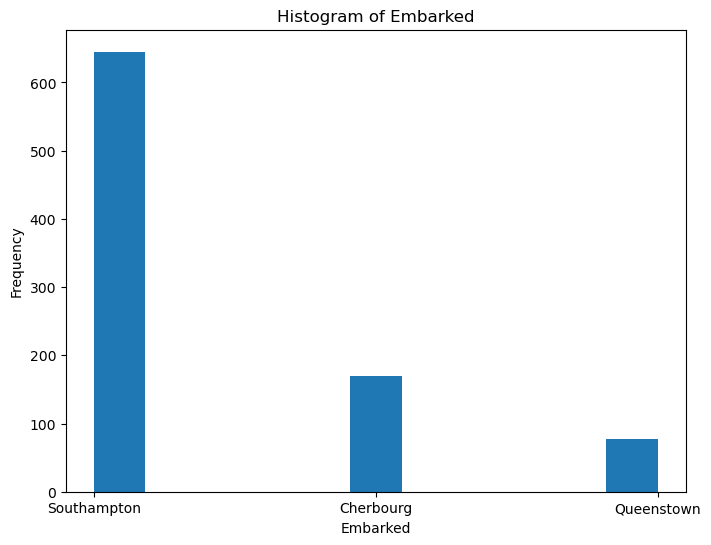

In [8]:
# Plot distribution of Embarked
plt.figure(figsize=(8,6))
plt.hist(titanic_data['Embarked'], bins='auto')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.title('Histogram of Embarked')
# Change S, Q, C to town names
plt.xticks(["S","Q","C"], ['Southampton', 'Queenstown', 'Cherbourg'])
plt.show()

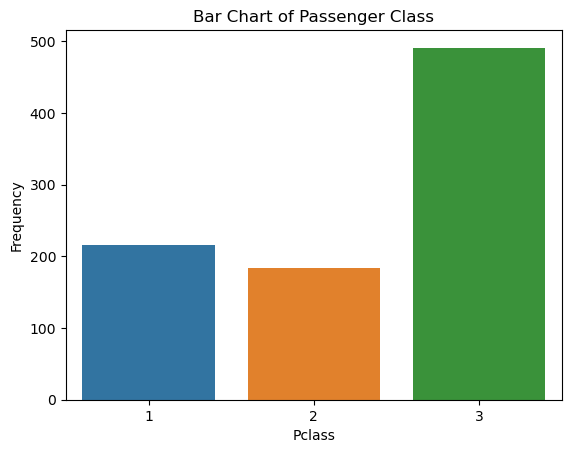

In [9]:
# Bar chart of Pclass with seaborn
sns.countplot(x='Pclass', data=titanic_data)
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.title('Bar Chart of Passenger Class')
plt.show()

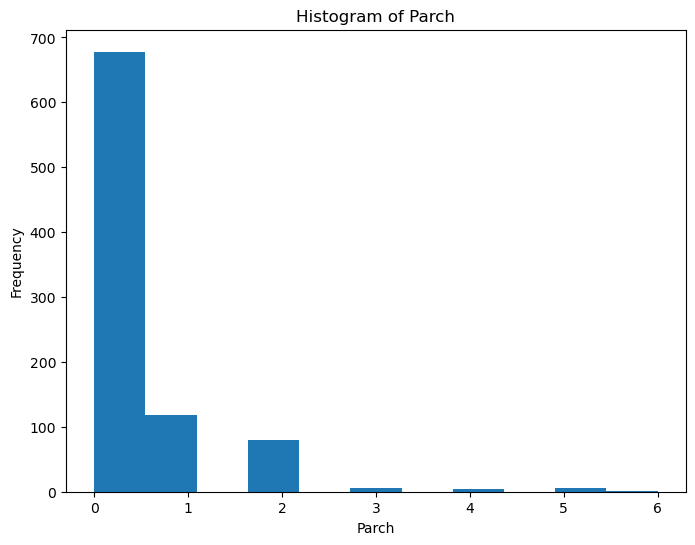

In [10]:
# Plot distribution of Parch
plt.figure(figsize=(8,6))
plt.hist(titanic_data['Parch'], bins='auto')
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.title('Histogram of Parch')
plt.show()

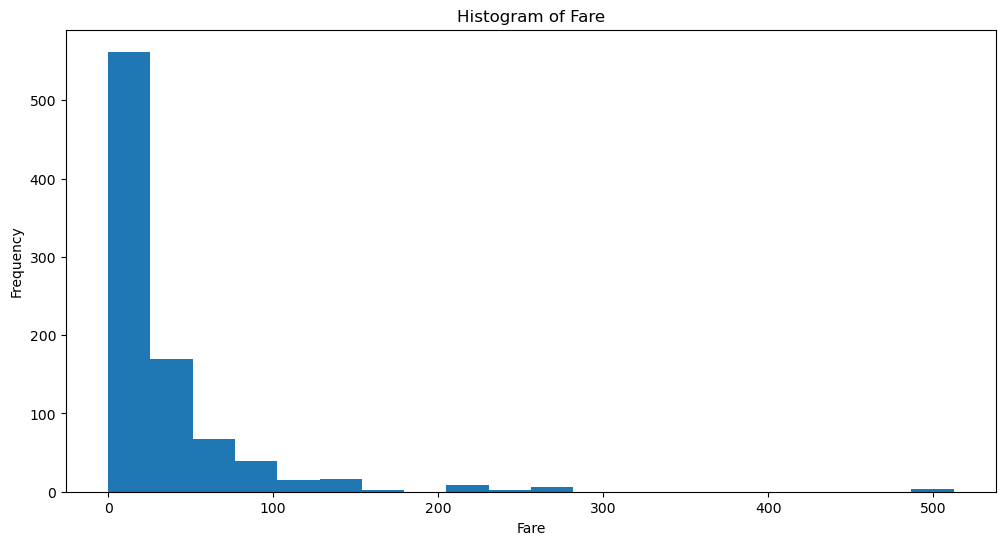

In [11]:
# Plot distribution of Fare
plt.figure(figsize=(12,6))
plt.hist(titanic_data['Fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare')
plt.show()

In [12]:
def create_fixed_dict(max: float, bins: float):
    # Get the bin width
    bin_width = max / bins
    # Define the fixed keys based on bin width
    keys = [bin_width * i for i in range(bins + 1)]

    # Initialize an empty dictionary with the keys as the default values
    fixed_dict = {key: 0 for key in keys}

    return fixed_dict

def add_value_to_fixed_dict(fixed_key_dict, value):
    # Find the next higher key
    next_higher_key = next((key for key in fixed_key_dict.keys() if key >= value), None)

    # If a next higher key exists, append the value to the list associated with it
    if next_higher_key is not None:
        fixed_key_dict[next_higher_key] += 1

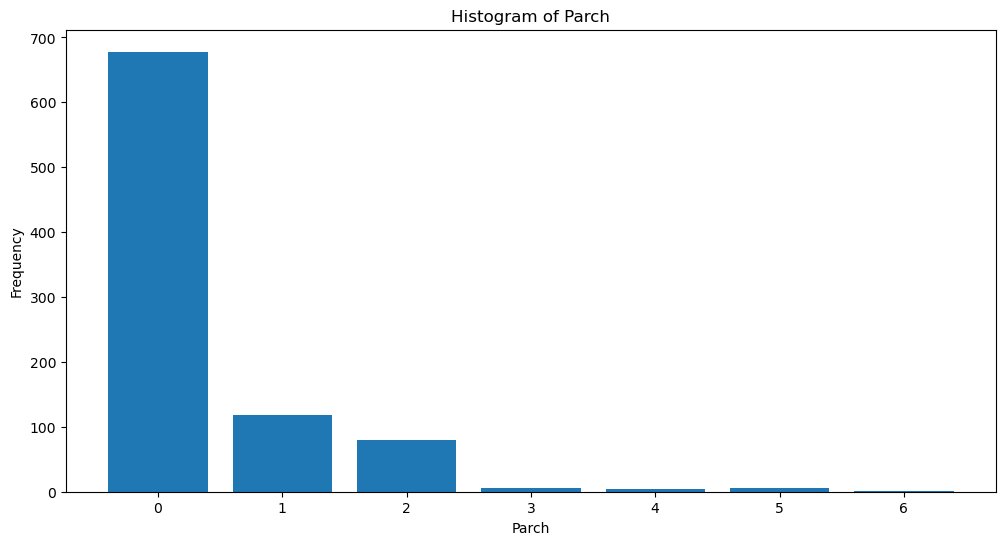

In [13]:
parch = create_fixed_dict(titanic_data['Parch'].max(), 6)
for value in titanic_data['Parch']:
    add_value_to_fixed_dict(parch, value)

# Plot distribution of Parch
plt.figure(figsize=(12,6))
# We cannot use plt.hist
plt.bar(parch.keys(), parch.values())
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.title('Histogram of Parch')
plt.show()

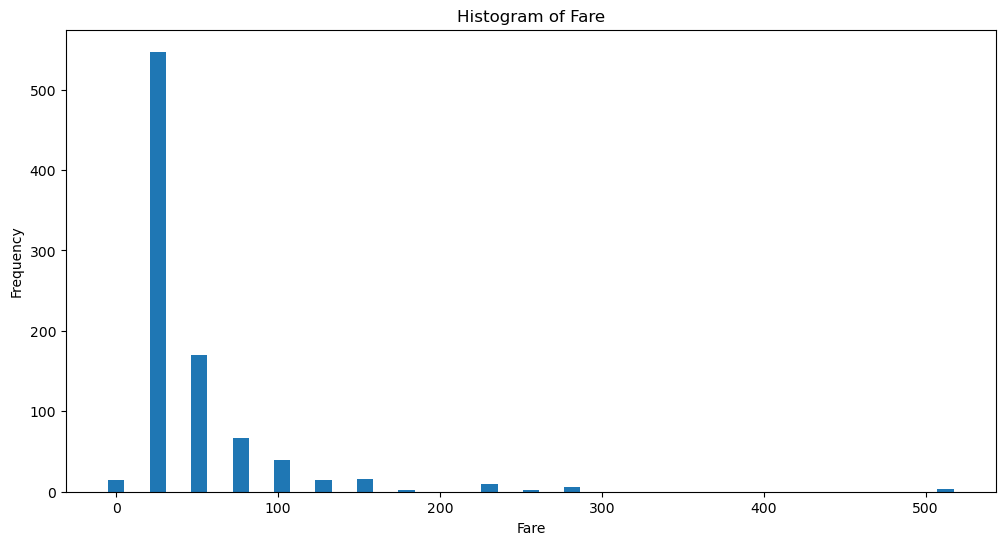

In [14]:
fare = create_fixed_dict(titanic_data['Fare'].max(), 20)
for value in titanic_data['Fare']:
    add_value_to_fixed_dict(fare, value)

titanic_data['Fare'].max()
fare

# Plot distribution of Fare
plt.figure(figsize=(12,6))
# We cannot use plt.hist
plt.bar(fare.keys(), fare.values(), width=10)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare')
plt.show()

In [15]:
def quantile(data: pd.DataFrame, q: float, by):
    data.sort_values(by=by, inplace=True, ignore_index=True)
    return data.iloc[int(len(data) * q)][by]


assert quantile(titanic_data, 0.2, 'Fare') == np.quantile(titanic_data['Fare'], 0.2)
assert quantile(titanic_data, 0.3, 'Fare') == np.quantile(titanic_data['Fare'], 0.3)
assert quantile(titanic_data, 0.5, 'Fare') == np.quantile(titanic_data['Fare'], 0.5)
assert quantile(titanic_data, 0.9, 'Fare') == np.quantile(titanic_data['Fare'], 0.9)

## Part 3: Generating data from probabilistic models

#### a)

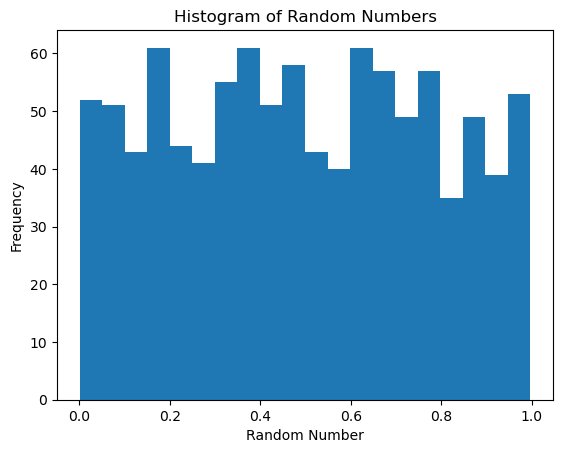

In [16]:
random_numbers = np.random.rand(1000)

plt.hist(random_numbers, bins=20)
plt.title('Histogram of Random Numbers')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.show()

The shape of the histogram is mostly uniform because numpy's random module uses pseudo-random RNG which generates numbers following a certain probability distribution (in this case uniform).

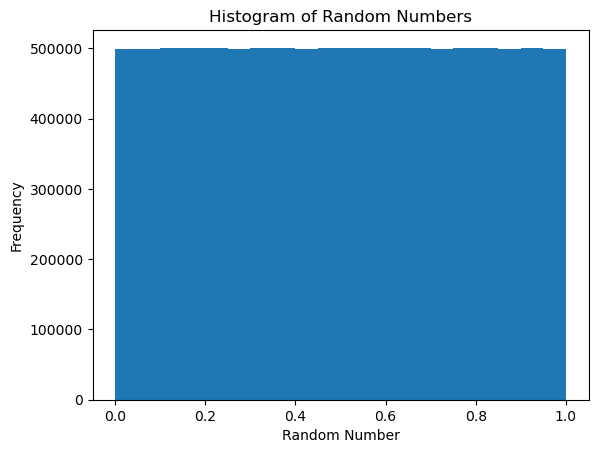

In [17]:
# Increase the number of generated values
random_numbers = np.random.rand(10000000)

plt.hist(random_numbers, bins=20)
plt.title('Histogram of Random Numbers')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.show()

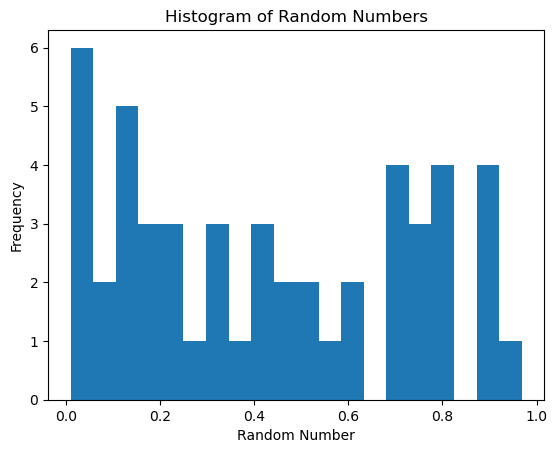

In [18]:
# Decrease the number of generated values
random_numbers = np.random.rand(50)

plt.hist(random_numbers, bins=20)
plt.title('Histogram of Random Numbers')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.show()

The more numbers we generate, the more uniform the histogram becomes which is inline with the Law of Large Numbers.

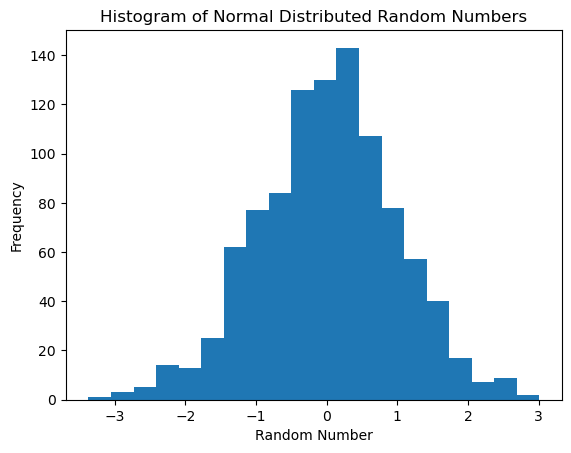

In [19]:
normal_dist_random = np.random.normal(0, 1, 1000)

plt.hist(normal_dist_random, bins=20)
plt.title('Histogram of Normal Distributed Random Numbers')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.show()

#### b) Modeling a student at an exam

In [20]:
def success(p_success):
    return bool(np.random.choice([0, 1], p=[1 - p_success, p_success]))

success_list = []
for _ in range(10000):
    success_list.append(success(0.7))

success_list.count(True)


6967

In [21]:
def exam_score(p_correct, n_instances):
    correct_answers = 0
    for _ in range(n_instances):
        if success(p_correct):
            correct_answers += 1
    return correct_answers

exam_score(0.7, 10000)

6976

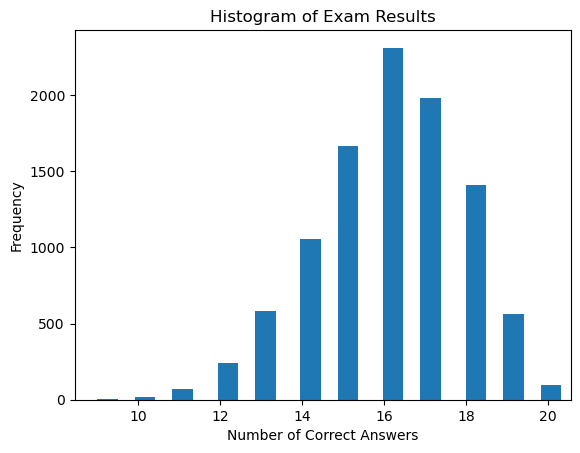

In [22]:
from turtle import width


exam_results = [exam_score(0.8, 20) for _ in range(10000)]

plt.hist(exam_results, bins='auto', width=0.5)
plt.title('Histogram of Exam Results')
plt.xlabel('Number of Correct Answers')
plt.ylabel('Frequency')
plt.show()

#### c) The persistent student

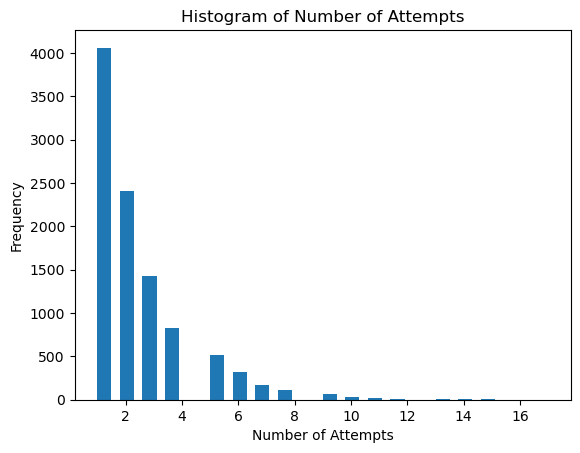

In [23]:
def number_of_attempts(p_pass):
    attempts = 1
    while not success(p_pass):
        attempts += 1
    return attempts

attempts = [number_of_attempts(0.4) for _ in range(10000)]

plt.hist(attempts, bins=20, width=0.5)
plt.title('Histogram of Number of Attempts')
plt.xlabel('Number of Attempts')
plt.ylabel('Frequency')
plt.show()

## Part 4: Exploring new visualization techniques for data analysis

#### 1. Correlation Heatmap

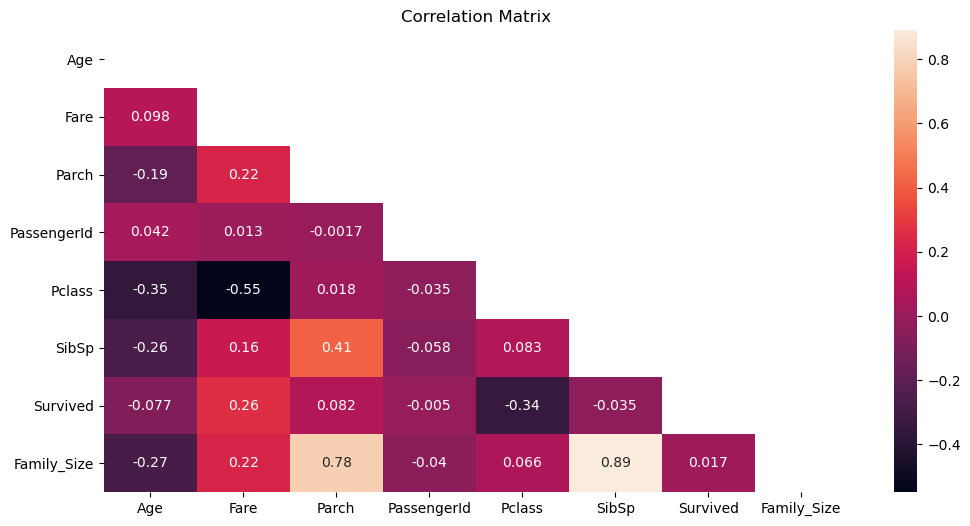

In [71]:
refined_data = titanic_data.drop(['Unnamed: 0'], axis=1)

correlation = refined_data.corr(numeric_only=True)
matrix = np.triu(correlation)
plt.figure(figsize=(12,6))
sns.heatmap(correlation, mask=matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

The heatmap shows the correlation coefficient between each variable in the data. We cannot really derive conclusions because we do not see any relevant strong correlations. We can see that the higher the fare, the higher the class but it is not interesting.

**Alternative Text**: Correlation heatmap of Titanic dataset where passenger class is correlated to chance of survival. 

#### 2. Violin plot

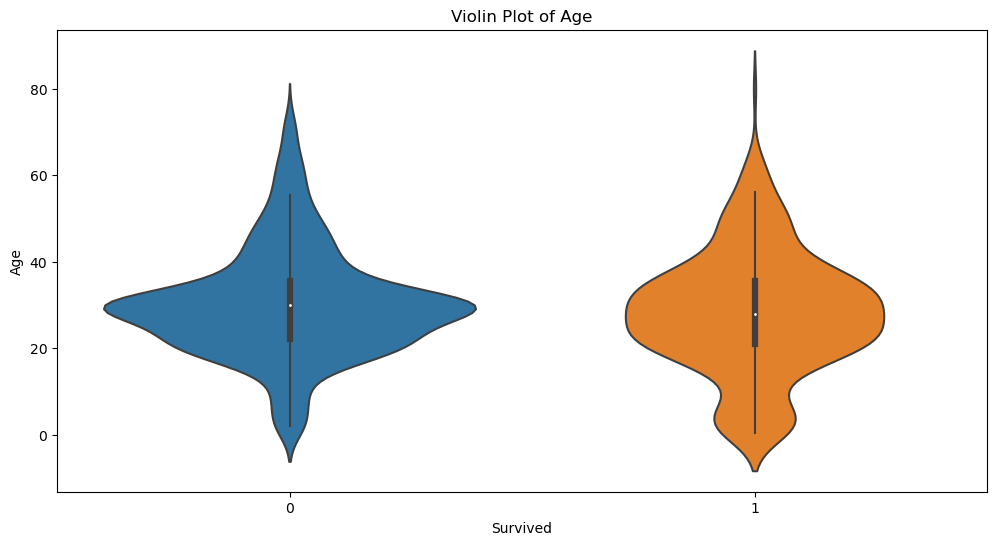

In [72]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Survived', y="Age", data=refined_data)
plt.title("Violin Plot of Age")
plt.show()

The violin plot highlights the distribution of the data and its PDF. It also shows the median and the quantiles.

**Alternative Text**: Violin plot of age and survival in the Titanic dataset where we don't see change in distribution. 

#### 3. Rain Cloud

<Axes: xlabel='Fare', ylabel='Pclass'>

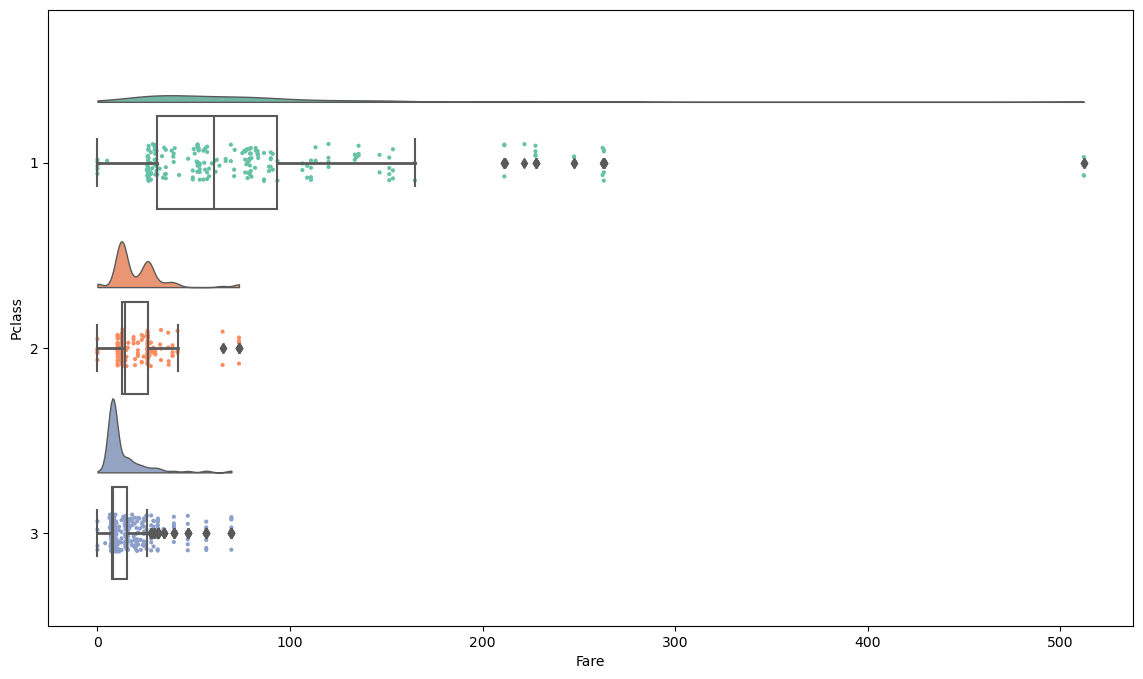

In [73]:
import ptitprince as pt

f, ax = plt.subplots(figsize=(14,8))

pt.RainCloud(x="Pclass",
            y="Fare", 
            data=refined_data, 
            width_viol=0.8, 
            width_box=0.5,
            orient='h',
            ax=ax
            )

The rain cloud plot combines violin plot, box plot and scatter plot. We can see the distribution, quantiles, mean.

**Alternative text**: Rain cloud plot of Passenger Class and Fare in the Titanic dataset where 3rd and 2nd class fares are a lot cheaper than 1st class. 